In [1]:
from dataProcessing import DataProcessing, createSolution
from drawFigures import DrawFigures
from hw3_helper_function import *
from models import Models
import pandas as pd
import os

## 数据处理

In [2]:
dp = DataProcessing()

# 获取当前文件所在的目录，这一步防止工作路径不是当前文件所在目录
current_dir = os.getcwd()

# 构造文件的完整路径
train_path = os.path.join(current_dir, 'train.csv')
test_path = os.path.join(current_dir, 'test.csv')

# 读取数据
# result = dp.readData('train.csv', 'test.csv')
# print(result)
X_train, y_train, X_test, df_train = dp.readData(train_path, test_path)
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X37,X38,X39,X40,X41,X42,X43,X44,X45,y
0,3.8,141,104,4.9,6.0,65,5.6,6.07,7.94,6.5,...,330,12.6,236,9.4,0.22,16.1,21.5,NaN,NaN,0
1,3.7,142,107,5.0,6.0,80,6.1,6.56,8.63,38.6,...,333,12.1,165,12.2,0.20,16.7,41.2,0.0,0.0,0
2,4.6,147,106,4.8,6.0,64,7.1,1.19,7.94,6.9,...,328,12.5,183,8.8,0.16,15.8,27.4,0.0,0.0,0
3,3.5,147,107,5.2,6.0,56,3.6,1.43,4.97,9.7,...,328,12.7,191,10.2,0.19,11.2,26.2,NaN,NaN,0
4,4.3,139,105,5.7,6.0,55,4.2,2.10,4.04,10.0,...,321,12.0,215,10.8,0.23,12.9,31.3,1.0,1.0,1


In [3]:
# 对X44，X45进行KNN插值
X_train, X_test = dp.impute_KNN(X_train, X_test, n_neighbors=5)
# 对数值型变量进行标准化
X_train, X_test = dp.standardization(X_train, X_test)

X_train = pd.DataFrame(X_train, columns=df_train.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df_train.columns[:-1])

In [4]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,-0.683184,-0.260198,0.120381,-0.541289,-0.153205,-0.201307,0.183487,-0.037732,-0.168351,-0.618797,...,0.330940,-0.161703,-0.490754,0.542940,-0.696238,0.221394,0.784223,-0.718792,0.0,0.0
1,-0.952763,0.073590,1.088378,-0.481282,-0.153205,0.299224,0.423796,-0.027830,-0.157037,2.080423,...,0.950709,0.065152,-0.677626,-0.545917,1.422576,-0.078073,1.005799,1.350118,0.0,0.0
2,1.473446,1.742528,0.765712,-0.601297,-0.153205,-0.234676,0.904413,-0.136347,-0.168351,-0.585162,...,-0.762769,-0.312939,-0.528129,-0.269868,-1.150270,-0.677007,0.673435,-0.099170,0.0,0.0
3,-1.491920,1.742528,1.088378,-0.361268,-0.153205,-0.501626,-0.777747,-0.131498,-0.217051,-0.349716,...,0.841338,-0.312939,-0.453380,-0.147180,-0.090863,-0.227807,-1.025315,-0.225195,0.0,0.0
4,0.664710,-0.927773,0.443047,-0.061231,-0.153205,-0.534994,-0.489377,-0.117958,-0.232300,-0.324490,...,-0.252372,-0.842267,-0.715001,0.220884,0.363169,0.371127,-0.397516,0.310412,1.0,1.0


## 作图

In [ ]:
# draw = DrawFigures(df_train, X_train)

# draw.drawAll()

### 作图显示主成分分析作用

In [12]:
from sklearn.decomposition import PCA

In [15]:
# 对两个自变量作出PCA线
def drawPca_pair(X1: str ='X1', X2: str ='X2'):
    data_X1 = X_train[X1]
    data_X2 = X_train[X2]

    # Combine x1 and x2 into a single dataset
    X = np.vstack((data_X1, data_X2)).T
    # print(X)

    # fit PCA
    pca = PCA(n_components=2)
    pca.fit(X)

    components = pca.components_
    means = pca.mean_
    explained_variane = pca.explained_variance_
    covariance_matrix = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # plot data points
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes = axes.ravel()

    ax1 = axes[0]
    ax1.scatter(X[:, 0], X[:, 1], alpha=0.6, edgecolor='k')
    ax1.set_title(f"{X2}~{X1}")
    ax1.set_xlabel(X1)
    ax1.set_ylabel(X2)
    # 设置横纵坐标轴比例相等
    ax1.axis('equal')

    return None

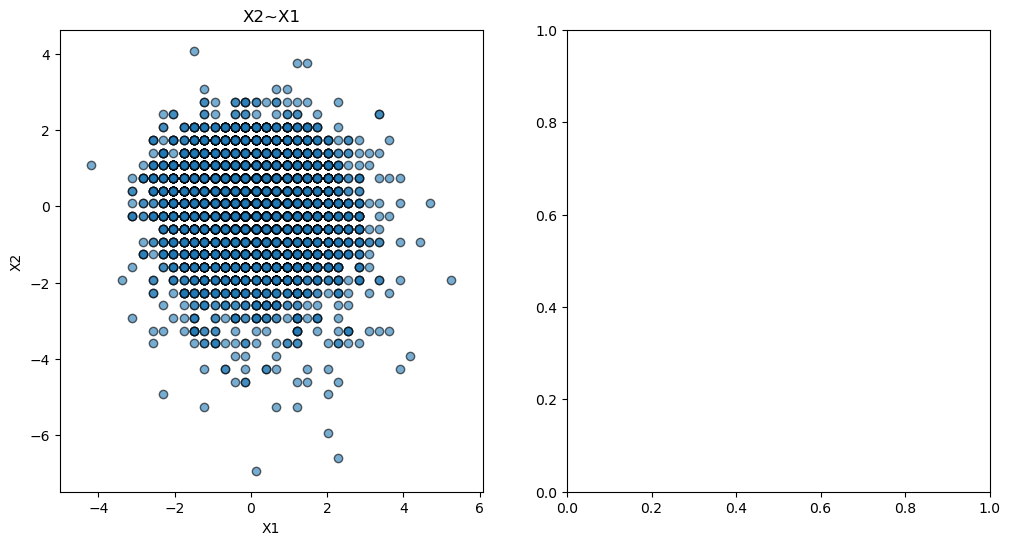

In [16]:
drawPca_pair()

## 模型训练

In [6]:
models = Models(X_train, y_train, X_test)

### 直接进行多元线性回归

In [7]:
y_pred_LR, report_LR = models.trainLR()

print(y_pred_LR)

print(report_LR)

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4431    0.0
4432    1.0
4433    0.0
4434    0.0
4435    1.0
Length: 4436, dtype: float64
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5497
           1       0.72      0.66      0.69      3375

    accuracy                           0.77      8872
   macro avg       0.76      0.75      0.75      8872
weighted avg       0.77      0.77      0.77      8872



### 直接进行多元逻辑回归

In [8]:
LgR_model = models.trainLgR()

y_pred_LgR, report_LgR = LgR_model

print(report_LgR)

# 生成结果文件
result = createSolution(X_test, y_pred_LgR, 'solution_LR')
print(type(X_test.index))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5497
           1       0.78      0.71      0.74      3375

    accuracy                           0.81      8872
   macro avg       0.80      0.79      0.80      8872
weighted avg       0.81      0.81      0.81      8872

Solution file 'solution_LR.csv' has been created.
<class 'pandas.core.indexes.range.RangeIndex'>


### 尝试根据两类数据的自变量均值及方差差异来确定权重，差异越大，权重越大

#### 直接删除一些分布差异较小的自变量再进行多元逻辑回归

In [9]:
# 删除部分自变量
X_train = X_train.drop(columns='X8')
X_test = X_test.drop(columns='X8')

# 进行多元逻辑回归
LR_model = models.trainLgR()

y_pred_LgR, report_LgR = LgR_model

print(report_LgR)

# 生成结果文件
result = createSolution(X_test, y_pred_LgR, 'solution_LgR')
# print(type(X_test.index))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5497
           1       0.78      0.71      0.74      3375

    accuracy                           0.81      8872
   macro avg       0.80      0.79      0.80      8872
weighted avg       0.81      0.81      0.81      8872

Solution file 'solution_LgR.csv' has been created.
